In [1]:
import numpy as np
import pandas as pd
import tensorflow
from os import listdir
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import pickle
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy
from sklearn import metrics
#from statsmodels.stats.weightstats import _tconfint_generic

C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\ten

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
from keras.layers import Convolution1D, Dense, Dropout, Input, merge, GlobalMaxPooling1D, MaxPooling1D, Flatten, LSTM
from keras.models import Model, load_model
from keras.optimizers import RMSprop
import random

Using TensorFlow backend.


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [5]:
from keras.layers import Dense, Dropout, Embedding, LSTM, LeakyReLU
from keras.models import Sequential

In [6]:
import tensorflow as tf
from sklearn.metrics import roc_auc_score

In [7]:
def auroc(y_true, y_pred):
    return tf.py_func(roc_auc_score, (y_true, y_pred), tf.double)

In [8]:
# References
# https://github.com/ShubhamVerma1/EEG-Signal-Classification/blob/master/Code.ipynb - попробовано (NN, LSTM)
# https://github.com/SuperBruceJia/EEG-Motor-Imagery-Classification-CNNs-TensorFlow - не пробовал (CNN)
# https://github.com/kiselev1189/EEGClassificationMCNN/blob/master/NewDatasetConvnet.ipynb - не пробовал, яндекс, не оч код
# https://github.com/Cerebro409/EEG-Classification-Using-Recurrent-Neural-Network/blob/master/eeg_lstm-v2.ipynb - не пробовал

# Read Data

In [42]:
#data = pd.read_csv('C:\\Users\\user\\cortex-v2-example\\python\\New_data_full_15\\full_data_shuffle.csv',
#                  index_col = False)
#data = pd.read_csv('C:\\Users\\user\\cortex-v2-example\\python\\New_data_full_16\\full_data_shuffle_21_04_1167.csv',
#                  index_col = False)
#data = pd.read_csv('C:\\Users\\user\\cortex-v2-example\\python\\data_22_04_new_approach\\data_train_new_appr.csv',
#                  index_col = False)
data = pd.read_csv('C:\\Users\\user\\cortex-v2-example\\python\\df_all.csv')
#data.rename(columns = {'0':'sample_num','15':'gesture'},inplace = True)
data = data.drop(columns = ['Unnamed: 0'])
print(data.shape)
data.head()

(280000, 16)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,sample_num,label
0,4233.462,4149.744,4195.000,4192.179,4136.282,4193.333,4199.872,4195.769,4184.231,4253.846,4195.000,4185.769,4188.462,4171.282,0,1
1,4231.795,4141.410,4194.103,4208.974,4135.385,4189.615,4190.769,4184.103,4177.436,4245.385,4189.359,4178.205,4178.718,4167.436,0,1
2,4226.282,4138.974,4191.923,4198.077,4148.333,4202.692,4180.769,4167.308,4164.487,4234.872,4178.974,4163.333,4163.462,4157.949,0,1
3,4235.641,4167.692,4198.846,4199.231,4165.256,4218.077,4186.282,4176.026,4172.436,4233.974,4191.667,4179.487,4176.667,4174.103,0,1
4,4247.436,4188.974,4207.051,4223.718,4162.436,4208.077,4190.641,4183.205,4175.128,4235.513,4201.923,4194.487,4189.359,4192.436,0,1


In [43]:
#df = data.replace(['сжать руку','разжать руку'], [1,0])
df = data.copy()
#print(df['gesture'].unique())
print(df['label'].unique())
df.shape

[1 0]


(280000, 16)

# Creation of experiments

## Data explore

In [108]:
def plot_coorelation_matrix(df):
    fig = plt.figure(figsize = (20,12))
    df = pd.DataFrame(df)
    corr = df.corr()
    ax = sns.heatmap(corr, 
                     vmin=-1, 
                     vmax=1, 
                     center=0,
                     cmap=sns.diverging_palette(20, 220, n=200),
                     square=True)
    ax.set_xticklabels(ax.get_xticklabels(),
                       rotation=45,
                       horizontalalignment='right');

In [109]:
def plot_sensor(data,name,color):
    color_list=["navy","darkmagenta","red","black"]
    fig, ax = plt.subplots(2,7, figsize=(28,16))
    sns.set(style="white")
    sns.set(style="whitegrid")
    x=0
    for i in range(2):
        for j in range(7):
            plt.suptitle(name)
            sns.distplot(data.iloc[:,x],kde=False,ax=ax[i][j],color=color_list[color],bins=20);
            x+=1
    plt.show()

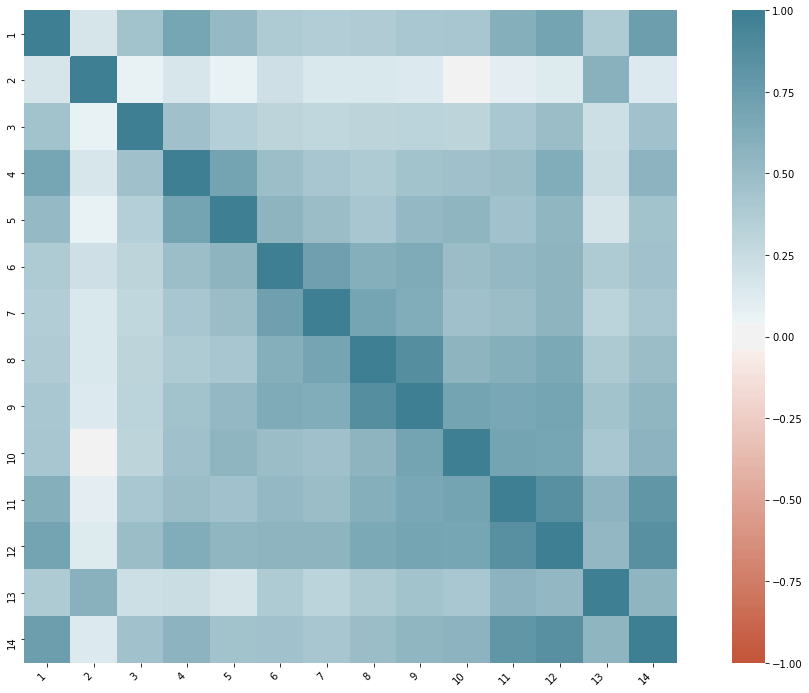

In [110]:
plot_coorelation_matrix(df.drop(columns = ['gesture','sample_num']))

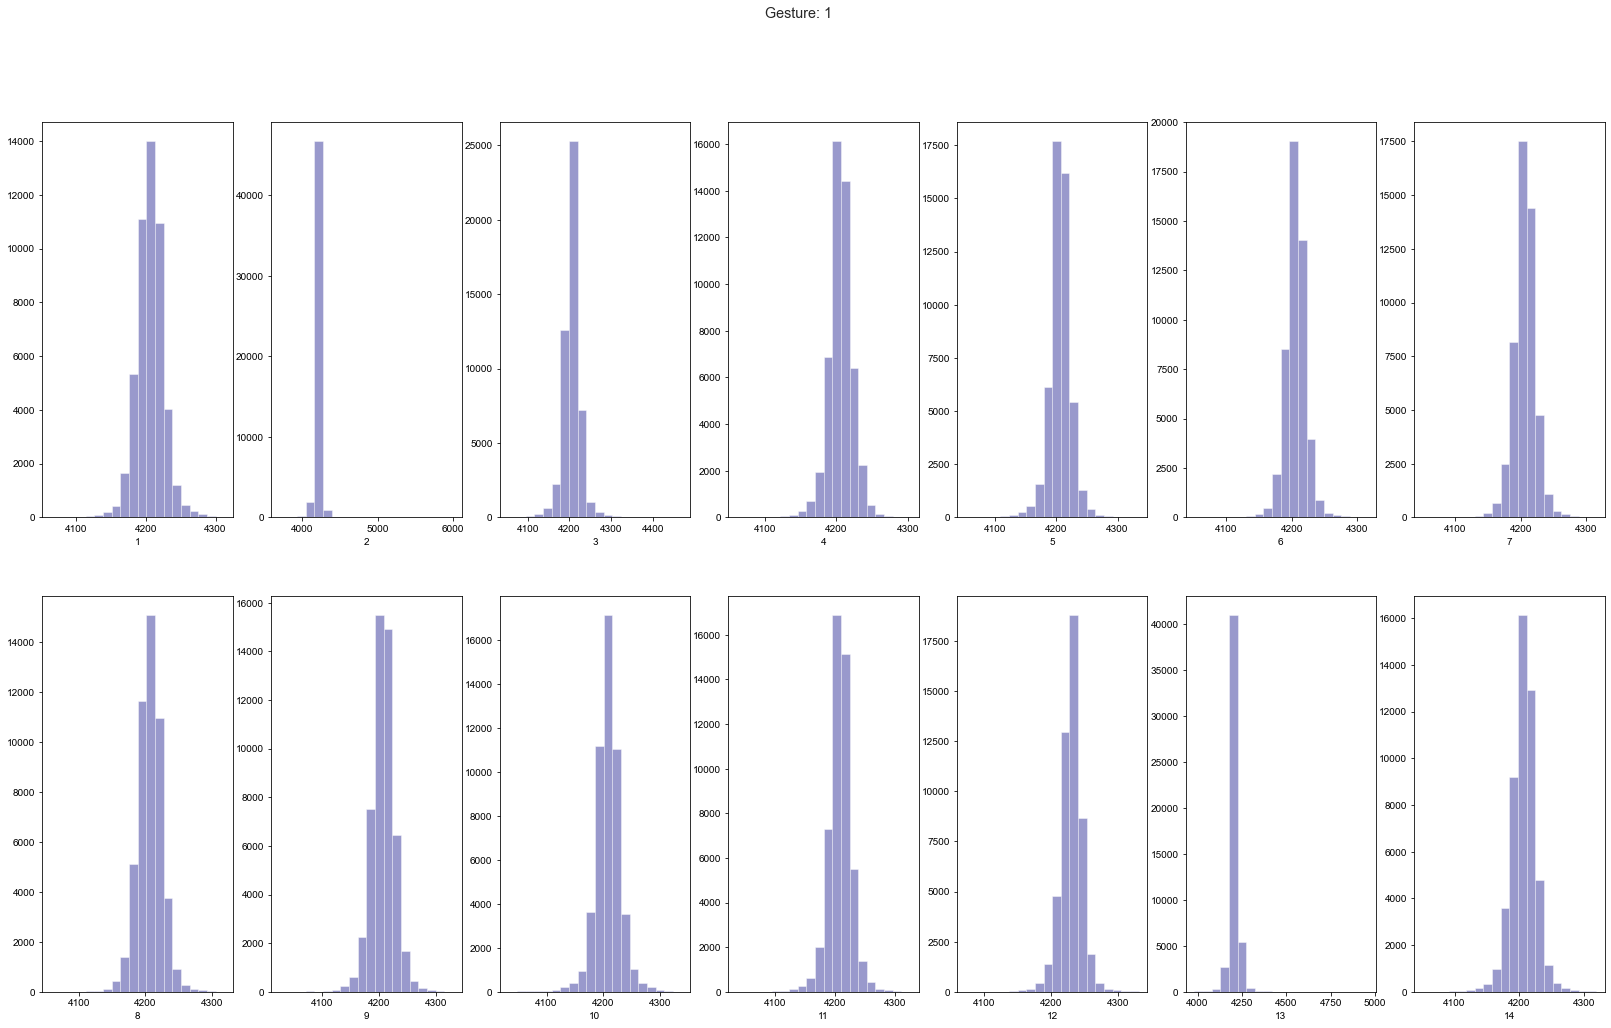

In [111]:
plot_sensor(df[df['gesture']==1].drop(columns=['sample_num', 'gesture']),'Gesture: 1',0)

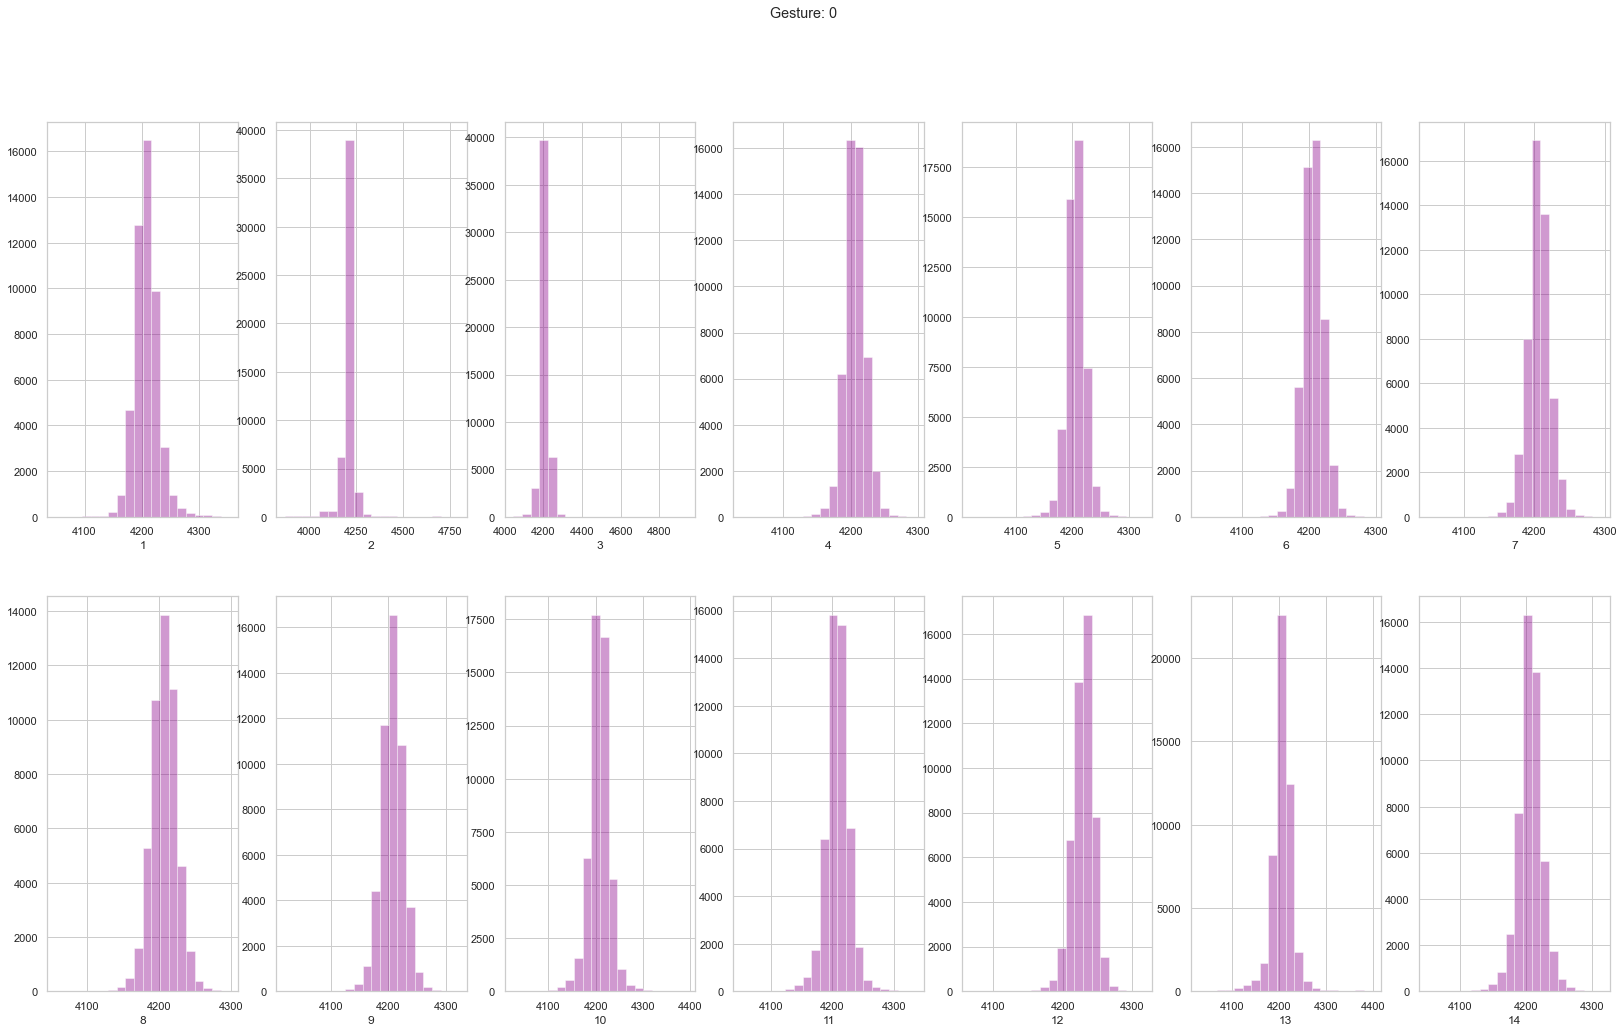

In [112]:
plot_sensor(df[df['gesture']==0].drop(columns=['sample_num', 'gesture']),'Gesture: 0',1)

## Adding features

In [159]:
df.head()

,sample_num,1,2,3,4,5,6,7,8,9,10,11,12,13,14,gesture
0,0,4314.359,4218.590,4211.923,4207.051,4199.872,4209.103,4202.821,4203.462,4191.795,4202.564,4212.949,4226.923,4216.154,4217.564,0
1,0,4296.667,4204.231,4195.897,4194.487,4187.436,4195.513,4201.026,4196.026,4183.077,4183.077,4194.872,4211.538,4199.103,4202.821,0
2,0,4305.769,4209.359,4199.103,4195.513,4208.205,4194.103,4186.923,4190.897,4180.769,4181.923,4197.692,4214.872,4197.692,4207.051,0
3,0,4329.872,4226.282,4219.615,4208.333,4225.769,4218.590,4187.436,4199.103,4191.667,4204.103,4215.256,4235.769,4214.615,4224.744,0
4,0,4321.282,4218.077,4216.282,4202.821,4201.923,4213.205,4196.795,4205.769,4201.026,4202.564,4206.538,4233.462,4209.615,4217.179,0


In [160]:
#X = df.groupby(['sample_num']).agg(['min','max','sum','mean','std','skew']).reset_index().drop(columns=['gesture', 'sample_num'])
X = df.groupby(['sample_num']).agg(['sum','mean','std','skew']).reset_index().drop(columns=['gesture', 'sample_num'])
X.head()

C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


1                                            2              \
          sum        mean        std      skew         sum        mean   
0  431040.006  4310.40006  13.148857 -0.145418  422275.388  4222.75388   
1  429456.024  4294.56024  20.624025  0.469093  424592.688  4245.92688   
2  426603.842  4266.03842  13.255429  0.121591  421986.799  4219.86799   
3  426186.414  4261.86414  17.008175  0.388280  423933.204  4239.33204   
4  424016.925  4240.16925  13.054049 -0.733485  421938.592  4219.38592   

                                 3              ...         12            \
         std      skew         sum        mean  ...        std      skew   
0  11.259058  0.925693  421663.469  4216.63469  ...  12.560249 -0.394037   
1  15.556198  0.706419  421201.922  4212.01922  ...  15.671253  0.117687   
2  14.373552 -0.228927  420904.873  4209.04873  ...  14.487198  0.348861   
3  18.832860  0.195715  420690.127  4206.90127  ...  11.373059 -0.527574   
4  12.650932  0.754463  420399.870  4203.99870  ...  12.822393  0.128829   

           13                                           14              \
          sum        mean        std      skew         sum        mean   
0  421497.945  4214.97945  18.317692 -1.282354  421749.749  4217.49749   
1  418919.740  4189.19740  19.874206  0.355128  419281.282  4192.81282   
2  421396.541  4213.96541  21.457575  0.321921  420208.338  4202.08338   
3  421828.719  4218.28719  13.905983  0.240404  421317.305  4213.17305   
4  421265.512  4212.65512  13.563664 -0.194463  420496.539  4204.96539   

                        
         std      skew  
0  14.284647 -0.424926  
1  18.798343  0.556029  
2  15.503169  0.564626  
3  15.766822  0.064520  
4  12.917164 -0.299879  

[5 rows x 56 columns]

In [161]:
X_kurt = df.groupby(['sample_num']).apply(pd.DataFrame.kurt).drop(columns =['sample_num', 'gesture'])
X_kurt = X_kurt.reset_index().drop(columns = ['sample_num'])

In [162]:
X = pd.concat([X, X_kurt], axis = 1)
X.head()

,"(1, sum)","(1, mean)","(1, std)","(1, skew)","(2, sum)","(2, mean)","(2, std)","(2, skew)","(3, sum)","(3, mean)",...,5,6,7,8,9,10,11,12,13,14
0,431040.006,4310.40006,13.148857,-0.145418,422275.388,4222.75388,11.259058,0.925693,421663.469,4216.63469,...,0.158282,0.480231,-0.155663,-0.113750,1.105309,2.591978,0.922843,0.422739,2.142318,0.843541
1,429456.024,4294.56024,20.624025,0.469093,424592.688,4245.92688,15.556198,0.706419,421201.922,4212.01922,...,-0.305032,0.173096,0.474177,-0.706754,-0.440211,-0.215350,-0.536716,-0.273022,0.757713,0.590539
2,426603.842,4266.03842,13.255429,0.121591,421986.799,4219.86799,14.373552,-0.228927,420904.873,4209.04873,...,-0.072038,-0.634111,-0.080198,-0.572210,-0.463263,-0.931559,-0.561619,-0.680034,-0.955036,-0.233890
3,426186.414,4261.86414,17.008175,0.388280,423933.204,4239.33204,18.832860,0.195715,420690.127,4206.90127,...,-0.480065,2.135504,0.494244,0.415464,0.729864,-0.701557,0.107515,1.236307,0.522749,0.475724
4,424016.925,4240.16925,13.054049,-0.733485,421938.592,4219.38592,12.650932,0.754463,420399.870,4203.99870,...,0.344715,1.977961,1.062138,-0.528115,-0.351181,-0.488883,-0.142272,-0.271946,-0.570188,0.276129


In [163]:
y = df.groupby(['sample_num']).agg(['min','max','sum','mean','std']).reset_index()['gesture']['min']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: min, dtype: int64

## Data preparation

In [164]:
X,y = shuffle(X, y, random_state=0)

In [165]:
train_size = int(len(X) * 0.9)
test_size = len(X) - train_size
train, test = X.iloc[0:train_size], X.iloc[train_size:len(X)]
print(train_size, test_size)

899 100


In [166]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
print(X_train.shape, X_test.shape)

(899, 70) (100, 70)


In [167]:
pickle.dump(scaler, open('pred_dir\\scaler_new.pkl', 'wb'))

In [168]:
y_train = y.iloc[0:train_size]
y_test = y.iloc[train_size:len(y)]
print(y_train.shape, y_test.shape)

(899,) (100,)


## Modelling

### Logistic regression

In [73]:
clf = LogisticRegression()
lr_accur_list = cross_val_score(clf, X_train, y_train, cv=20, scoring = 'accuracy')
print('Mean Accuracy after 20 experiments', lr_accur_list.mean())
print(lr_accur_list)

Mean Accuracy after 20 experiments 0.5791666666666667
[0.51666667 0.525      0.625      0.50833333 0.58333333 0.60833333
 0.68333333 0.6        0.54166667 0.6        0.61666667 0.54166667
 0.63333333 0.59166667 0.575      0.46666667 0.59166667 0.55
 0.65       0.575     ]


In [170]:
#lr_mean_std = lr_accur_list.std(ddof=1)/sqrt(len(lr_accur_list))
#print('logistic regression model mean accuracy 95%% confidence interval', _tconfint_generic(lr_accur_list.mean(), 
#                                                                       lr_mean_std,
#                                                                       len(lr_accur_list) - 1,
#                                                                       0.05, 'two-sided'))

In [74]:
clf = LogisticRegression().fit(X_train, y_train)
print('Accuracy score for test: ',
      accuracy_score(y_test, clf.predict(X_test)))

Accuracy score for test:  0.5225


In [75]:
print('Accuracy score for test: ',
      accuracy_score(y_test[:200], clf.predict(X_test[:200])))

Accuracy score for test:  0.375


In [76]:
print('Accuracy score for test: ',
      accuracy_score(y_test[200:400], clf.predict(X_test[200:400])))

Accuracy score for test:  0.67


### Decision Tree

In [77]:
tree_clf = DecisionTreeClassifier()
tree_accur_list = cross_val_score(tree_clf, X_train, y_train, cv=20, scoring = 'accuracy')
print('Mean Accuracy after 20 experiments', tree_accur_list.mean())
print(tree_accur_list)

Mean Accuracy after 20 experiments 0.5783333333333334
[0.575      0.59166667 0.575      0.49166667 0.59166667 0.63333333
 0.64166667 0.575      0.575      0.58333333 0.54166667 0.625
 0.58333333 0.56666667 0.63333333 0.525      0.55833333 0.55833333
 0.56666667 0.575     ]


In [173]:
#tree_mean_std = tree_accur_list.std(ddof=1)/sqrt(len(tree_accur_list))
#print('decision tree model mean accuracy 95%% confidence interval', _tconfint_generic(tree_accur_list.mean(), 
#                                                                       tree_mean_std,
#                                                                       len(tree_accur_list) - 1,
#                                                                       0.05, 'two-sided'))

In [78]:
tree_clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy score for test: ',
      accuracy_score(y_test, tree_clf.predict(X_test)))

Accuracy score for test:  0.4975


In [79]:
tree_clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy score for test: ',
      accuracy_score(y_test[:200], tree_clf.predict(X_test[:200])))

Accuracy score for test:  0.385


In [80]:
print('Accuracy score for test: ',
      accuracy_score(y_test[200:400], tree_clf.predict(X_test[200:400])))

Accuracy score for test:  0.58


### Random Forest classifier

In [81]:
forest_clf = RandomForestClassifier()
forest_accur_list = cross_val_score(forest_clf, X_train, y_train, cv=20, scoring = 'accuracy')
print('Mean Accuracy after 20 experiments', forest_accur_list.mean())
print(forest_accur_list)

Mean Accuracy after 20 experiments 0.6758333333333334
[0.65833333 0.675      0.675      0.64166667 0.70833333 0.675
 0.7        0.7        0.65       0.68333333 0.70833333 0.675
 0.69166667 0.69166667 0.68333333 0.61666667 0.69166667 0.66666667
 0.675      0.65      ]


In [176]:
#forest_mean_std = forest_accur_list.std(ddof=1)/sqrt(len(forest_accur_list))
#print('random forest model mean accuarcy 95%% confidence interval', _tconfint_generic(forest_accur_list.mean(), 
#                                                                       forest_mean_std,
#                                                                       len(forest_accur_list) - 1,
#                                                                       0.05, 'two-sided'))

In [82]:
forest_clf = RandomForestClassifier().fit(X_train, y_train)
print('Accuracy score for test: ',
      accuracy_score(y_test, forest_clf.predict(X_test)))

Accuracy score for test:  0.5375


In [83]:
print('Accuracy score for test: ',
      accuracy_score(y_test[:200], forest_clf.predict(X_test[:200])))

Accuracy score for test:  0.505


In [85]:
print('Accuracy score for test: ',
      accuracy_score(y_test[200:], forest_clf.predict(X_test[200:])))

Accuracy score for test:  0.57


### Gradient Boosting classifier (best)

In [86]:
boosting_clf = GradientBoostingClassifier()
boosting_accur_list = cross_val_score(boosting_clf, X_train, y_train, cv=20, scoring = 'accuracy')
print('Mean Accuracy after 20 experiments', boosting_accur_list.mean())
print(boosting_accur_list)

Mean Accuracy after 20 experiments 0.6770833333333334
[0.63333333 0.65833333 0.725      0.65833333 0.61666667 0.65
 0.7        0.74166667 0.69166667 0.69166667 0.66666667 0.69166667
 0.66666667 0.73333333 0.69166667 0.69166667 0.61666667 0.68333333
 0.625      0.70833333]


In [179]:
#boosting_mean_std = boosting_accur_list.std(ddof=1)/sqrt(len(boosting_accur_list))
#print('random forest model mean accuracy 95%% confidence interval', _tconfint_generic(boosting_accur_list.mean(), 
#                                                                       boosting_mean_std,
#                                                                       len(boosting_accur_list) - 1,
#                                                                       0.05, 'two-sided'))

In [87]:
boosting_clf = GradientBoostingClassifier().fit(X_train, y_train)
print('Accuracy score for test: ',
      accuracy_score(y_test, boosting_clf.predict(X_test)))

Accuracy score for test:  0.5325


In [88]:
print('Accuracy score for test: ',
      accuracy_score(y_test[:200], boosting_clf.predict(X_test[:200])))

Accuracy score for test:  0.465


In [89]:
print('Accuracy score for test: ',
      accuracy_score(y_test[200:], boosting_clf.predict(X_test[200:])))

Accuracy score for test:  0.6


# Neural Network (github, yandex)

In [ ]:
# https://github.com/kiselev1189/EEGClassificationMCNN/blob/master/NewDatasetConvnet.ipynb

## Data preparation

In [67]:
X = df.drop(columns=['gesture'])
y = df['gesture']
print(X.shape, y.shape)

(62000, 15) (62000,)


In [68]:
train_size = int(len(X) * 0.9)
test_size = len(X) - train_size
train, test = X.iloc[0:train_size], X.iloc[train_size:len(X)]
print(train_size, test_size)

55800 6200


In [69]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
print(X_train.shape, X_test.shape)

(55800, 15) (6200, 15)


In [70]:
y_train = y.iloc[0:train_size]
y_test = y.iloc[train_size:len(y)]
print(y_train.shape, y_test.shape)

(55800,) (6200,)


In [73]:
def get_base_model(input_len, fsize):
    '''Base network to be shared (eq. to feature extraction).
    '''
    input_seq = Input(shape=(input_len, 24))
    nb_filters = 50
    convolved = Convolution1D(nb_filters, 5, border_mode="same", activation="tanh")(input_seq)
    pooled = GlobalMaxPooling1D()(convolved)
    compressed = Dense(50, activation="linear")(pooled)
    compressed = Dropout(0.3)(compressed)
    compressed = Dense(50, activation="relu")(compressed)
    compressed = Dropout(0.3)(compressed)
    model = Model(input=input_seq, output=compressed)            
    return model

slice_len = 100

input1125_seq = Input(shape=(slice_len, 24))

base_network1125 = get_base_model(slice_len, 10)

embedding_1125 = base_network1125(input1125_seq)
out = Dense(2, activation='softmax')(embedding_1125)
    
model = Model(input=input1125_seq, output=out)
    
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["categorical_accuracy"])

C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Update your `Conv1D` call to the Keras 2 API: `Conv1D(50, 5, activation="tanh", padding="same")`
  
C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("dr...)`
  if sys.path[0] == '':
C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\ipykernel_launcher.py:24: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`


In [56]:
def generate_slice(test=False):
    if test:
        experiment_data = random.choice(list(test.values()))
    else:
        experiment_data = random.choice(list(train.values()))
    
    X = experiment_data.drop(columns=['gesture','sample_num'])
    y = experiment_data["gesture"]
    
    while True:
        slice_start = np.random.choice(len(X) - slice_len)
        slice_end = slice_start + slice_len
        slice_x = X[slice_start:slice_end]
        #slice_x = normalize(slice_x)
        slice_y = y[slice_start:slice_end]
        
        if len(set(slice_y)) == 1:
            return slice_x, to_onehot(slice_y[-1])


def data_generator(batch_size, test=False):
    while True:
        batch_x = []
        batch_y = []
        
        for i in range(0, batch_size):
            x, y = generate_slice(test=test)
            batch_x.append(x)
            batch_y.append(y)
            
        y = np.array(batch_y)
        x = np.array([i for i in batch_x])
        yield (x, y)

In [74]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

nb_epoch = 100000
earlyStopping = EarlyStopping(monitor='categorical_accuracy', patience=10, verbose=0, mode='auto')
checkpointer = ModelCheckpoint("convlstm_alldata.h5", monitor='categorical_accuracy', verbose=0,
                               save_best_only=True, mode='auto', period=1)

samples_per_epoch = 15000
nb_epoch = 1

#model.fit_generator(data_generator(batch_size=25), samples_per_epoch, nb_epoch, 
#                    callbacks=[earlyStopping, checkpointer], verbose=2, nb_val_samples=15000,
#                    validation_data=data_generator(batch_size=25, test=True))
model.fit(x=X_train, y=y_train, batch_size=25, epochs=10, validation_data=X_test, shuffle=False)

ValueError: Error when checking input: expected input_15 to have 3 dimensions, but got array with shape (55800, 15)

# Neural Network (Udacity)

In [44]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,sample_num,label
0,4233.462,4149.744,4195.000,4192.179,4136.282,4193.333,4199.872,4195.769,4184.231,4253.846,4195.000,4185.769,4188.462,4171.282,0,1
1,4231.795,4141.410,4194.103,4208.974,4135.385,4189.615,4190.769,4184.103,4177.436,4245.385,4189.359,4178.205,4178.718,4167.436,0,1
2,4226.282,4138.974,4191.923,4198.077,4148.333,4202.692,4180.769,4167.308,4164.487,4234.872,4178.974,4163.333,4163.462,4157.949,0,1
3,4235.641,4167.692,4198.846,4199.231,4165.256,4218.077,4186.282,4176.026,4172.436,4233.974,4191.667,4179.487,4176.667,4174.103,0,1
4,4247.436,4188.974,4207.051,4223.718,4162.436,4208.077,4190.641,4183.205,4175.128,4235.513,4201.923,4194.487,4189.359,4192.436,0,1


## Appr 1

### Prepare data

In [45]:
#X = df.groupby(['sample_num']).agg(['min','max','sum','mean','std','skew']).reset_index().drop(columns=['gesture', 'sample_num'])
X = df.groupby(['sample_num']).agg(['sum','mean','std','skew']).reset_index().drop(columns=['label', 'sample_num'])
print(X.shape)
X.head()

(2800, 56)


C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\pandas\core\generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


0                                            1              \
          sum        mean        std      skew         sum        mean   
0  422535.386  4225.35386  22.943132  0.623300  416386.148  4163.86148   
1  418849.104  4188.49104  13.141999  1.685818  417558.720  4175.58720   
2  418708.458  4187.08458  10.480366  1.143462  421533.199  4215.33199   
3  419694.230  4196.94230  12.200193  0.852128  420814.359  4208.14359   
4  420775.134  4207.75134  17.454689  0.925080  420168.850  4201.68850   

                                 2              ...         11            \
         std      skew         sum        mean  ...        std      skew   
0  23.646534  1.653921  420429.743  4204.29743  ...  12.986948  0.292322   
1  17.344086  1.499177  421727.564  4217.27564  ...  11.527668  0.203475   
2  22.858908  1.664043  424451.155  4244.51155  ...  12.861367 -0.178935   
3  29.285325  1.635677  420965.128  4209.65128  ...  13.132305  0.416484   
4  34.312835  0.816006  420311.407  4203.11407  ...  12.525939  0.735080   

           12                                           13              \
          sum        mean        std      skew         sum        mean   
0  418407.820  4184.07820  11.716692 -0.322284  420480.388  4204.80388   
1  420292.567  4202.92567  14.340586 -0.456426  420625.897  4206.25897   
2  421826.160  4218.26160  13.122579  0.219388  421802.691  4218.02691   
3  421877.049  4218.77049  12.508268 -0.361629  421668.079  4216.68079   
4  422885.895  4228.85895  14.110537  0.158259  422612.820  4226.12820   

                        
         std      skew  
0  15.128111 -0.529249  
1  10.324266  0.318849  
2  11.011654  0.010080  
3  13.883749  0.490287  
4  16.676755  0.749659  

[5 rows x 56 columns]

In [46]:
X_kurt = df.groupby(['sample_num']).apply(pd.DataFrame.kurt).drop(columns =['sample_num', 'label'])
X_kurt = X_kurt.reset_index().drop(columns = ['sample_num'])
print(X_kurt.shape)
X_kurt.head()

(2800, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.121036,2.321952,-0.449738,-0.208740,-0.227091,0.275026,-0.767402,-0.462860,-0.670035,-0.840695,-0.353871,-0.179143,-0.068469,0.495747
1,3.223837,2.953703,-1.221506,4.035890,-0.368210,-0.002820,-0.108777,0.341003,0.693150,-0.470444,-0.553766,-0.540069,0.111163,-0.207836
2,1.358433,2.536829,-1.009442,1.128803,-0.330908,1.005082,0.304864,1.431213,0.666686,0.131994,0.009822,-0.552262,-0.134105,0.334541
3,-0.134144,1.895580,-0.945230,1.142032,-0.253959,-0.512105,-0.366236,-0.418871,-0.521497,-0.649155,-0.303190,-0.067776,-0.160889,-0.365442
4,-0.103128,-0.360645,1.008207,0.113093,-0.321950,0.160976,-0.945195,0.057205,-0.353816,-0.898919,-0.475137,0.009528,-0.450036,-0.176413


In [47]:
X = pd.concat([X, X_kurt], axis = 1)
X.head()

,"(0, sum)","(0, mean)","(0, std)","(0, skew)","(1, sum)","(1, mean)","(1, std)","(1, skew)","(2, sum)","(2, mean)",...,4,5,6,7,8,9,10,11,12,13
0,422535.386,4225.35386,22.943132,0.623300,416386.148,4163.86148,23.646534,1.653921,420429.743,4204.29743,...,-0.227091,0.275026,-0.767402,-0.462860,-0.670035,-0.840695,-0.353871,-0.179143,-0.068469,0.495747
1,418849.104,4188.49104,13.141999,1.685818,417558.720,4175.58720,17.344086,1.499177,421727.564,4217.27564,...,-0.368210,-0.002820,-0.108777,0.341003,0.693150,-0.470444,-0.553766,-0.540069,0.111163,-0.207836
2,418708.458,4187.08458,10.480366,1.143462,421533.199,4215.33199,22.858908,1.664043,424451.155,4244.51155,...,-0.330908,1.005082,0.304864,1.431213,0.666686,0.131994,0.009822,-0.552262,-0.134105,0.334541
3,419694.230,4196.94230,12.200193,0.852128,420814.359,4208.14359,29.285325,1.635677,420965.128,4209.65128,...,-0.253959,-0.512105,-0.366236,-0.418871,-0.521497,-0.649155,-0.303190,-0.067776,-0.160889,-0.365442
4,420775.134,4207.75134,17.454689,0.925080,420168.850,4201.68850,34.312835,0.816006,420311.407,4203.11407,...,-0.321950,0.160976,-0.945195,0.057205,-0.353816,-0.898919,-0.475137,0.009528,-0.450036,-0.176413


In [48]:
X.isnull().values.any()

False

In [49]:
y = data.groupby(['sample_num']).agg(['min','max','sum','mean','std']).reset_index()['label']['min']
y.unique()

array([1, 0], dtype=int64)

In [50]:
X_train = X.iloc[:2400,:]
X_test = X.iloc[2400:,:]
print(X_train.shape, X_test.shape)

(2400, 70) (400, 70)


In [53]:
y_train = y.iloc[:2400]
y_test = y.iloc[2400:]
print(y_train.shape, y_test.shape)

(2400,) (400,)


In [54]:
#X,y = shuffle(X, y, random_state=0)
X_train, y_train = shuffle(X_train, y_train, random_state=0)

In [22]:
#train_size = int(len(X) * 0.9)
#test_size = len(X) - train_size
#train, test = X.iloc[0:train_size], X.iloc[train_size:len(X)]
#print(train_size, test_size)

2520 280


In [55]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(train)
#X_test = scaler.transform(test)
#print(X_train.shape, X_test.shape)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.shape, X_test.shape)

(2400, 70) (400, 70)


In [24]:
pickle.dump(scaler, open('pred_dir\\scaler_new.pkl', 'wb'))

In [25]:
y_train = y.iloc[0:train_size]
y_test = y.iloc[train_size:len(y)]
print(y_train.shape, y_test.shape)

(2520,) (280,)


### Model 1

In [56]:
model = Sequential()
model.add(Dense(512, activation = 'relu', input_shape = (X_train.shape[1], )))
model.add(Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               36352     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 36,865
Trainable params: 36,865
Non-trainable params: 0
_________________________________________________________________


In [57]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               36352     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 513       
Total params: 36,865
Trainable params: 36,865
Non-trainable params: 0
_________________________________________________________________


In [58]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'MLP.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model.fit(X_train, y_train, epochs = 100, batch_size=32, validation_split = 0.05, callbacks = [checkpointer], verbose = 2, shuffle = True)

Train on 2280 samples, validate on 120 samples
Epoch 1/100
 - 0s - loss: 0.6940 - accuracy: 0.5623 - val_loss: 0.6292 - val_accuracy: 0.6750

Epoch 00001: val_loss improved from inf to 0.62917, saving model to MLP.weights.best.hdf5
Epoch 2/100
 - 0s - loss: 0.6473 - accuracy: 0.6167 - val_loss: 0.6094 - val_accuracy: 0.7000

Epoch 00002: val_loss improved from 0.62917 to 0.60940, saving model to MLP.weights.best.hdf5
Epoch 3/100
 - 0s - loss: 0.6255 - accuracy: 0.6461 - val_loss: 0.6364 - val_accuracy: 0.5833

Epoch 00003: val_loss did not improve from 0.60940
Epoch 4/100
 - 0s - loss: 0.6069 - accuracy: 0.6789 - val_loss: 0.6316 - val_accuracy: 0.6000

Epoch 00004: val_loss did not improve from 0.60940
Epoch 5/100
 - 0s - loss: 0.5903 - accuracy: 0.6789 - val_loss: 0.6247 - val_accuracy: 0.6000

Epoch 00005: val_loss did not improve from 0.60940
Epoch 6/100
 - 0s - loss: 0.5686 - accuracy: 0.7057 - val_loss: 0.6156 - val_accuracy: 0.6500

Epoch 00006: val_loss did not improve from 0.6


Epoch 00055: val_loss did not improve from 0.59021
Epoch 56/100
 - 0s - loss: 0.1488 - accuracy: 0.9632 - val_loss: 0.9127 - val_accuracy: 0.6333

Epoch 00056: val_loss did not improve from 0.59021
Epoch 57/100
 - 0s - loss: 0.1322 - accuracy: 0.9724 - val_loss: 0.8160 - val_accuracy: 0.6500

Epoch 00057: val_loss did not improve from 0.59021
Epoch 58/100
 - 0s - loss: 0.1040 - accuracy: 0.9846 - val_loss: 0.8295 - val_accuracy: 0.6667

Epoch 00058: val_loss did not improve from 0.59021
Epoch 59/100
 - 0s - loss: 0.1483 - accuracy: 0.9768 - val_loss: 0.9471 - val_accuracy: 0.6833

Epoch 00059: val_loss did not improve from 0.59021
Epoch 60/100
 - 0s - loss: 0.2175 - accuracy: 0.9504 - val_loss: 0.9389 - val_accuracy: 0.6833

Epoch 00060: val_loss did not improve from 0.59021
Epoch 61/100
 - 0s - loss: 0.0995 - accuracy: 0.9873 - val_loss: 0.8586 - val_accuracy: 0.6750

Epoch 00061: val_loss did not improve from 0.59021
Epoch 62/100
 - 0s - loss: 0.0893 - accuracy: 0.9939 - val_loss: 0

In [59]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: ", score[1])

400/400 [==============================] - 0s 38us/step
Accuracy:  0.5625


In [61]:
score = model.evaluate(X_test[:200, :], y_test[:200], verbose=1)
print("Accuracy: ", score[1])

200/200 [==============================] - 0s 45us/step
Accuracy:  0.46000000834465027


In [62]:
score = model.evaluate(X_test[200:400, :], y_test[200:400], verbose=1)
print("Accuracy: ", score[1])

200/200 [==============================] - 0s 45us/step
Accuracy:  0.6650000214576721


In [29]:
score = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: ", score[1])

280/280 [==============================] - 0s 39us/step
Accuracy:  0.6321428418159485


In [30]:
predict2 = [1 if a>0.5 else 0 for a in model.predict(X_test)]

In [31]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict2), 
                                                                         metrics.precision_score(y_test, predict2),
                                                                         metrics.recall_score(y_test, predict2),
                                                                         metrics.f1_score(y_test, predict2)))

Accuracy = 0.6321428571428571
Precision = 0.6293706293706294
Recall = 0.6428571428571429
F1 Score = 0.6360424028268551


### Model 2

In [63]:
model2 = Sequential()
model2.add(Dense(1000, activation = 'relu', input_shape = (X_train.shape[1], )))
model2.add(Dropout(0.2))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1000, activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1000)              71000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [64]:
model2.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1000)              71000     
_________________________________________________________________
dropout_4 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_6 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

In [65]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'MLP_new.weights.best.hdf5', verbose = 1, save_best_only = True)
hist1 = model2.fit( X_train, y_train, epochs = 100, batch_size=32, validation_split = 0.05, callbacks = [checkpointer], verbose = 2, shuffle = True )

Train on 2280 samples, validate on 120 samples
Epoch 1/100
 - 4s - loss: 0.7139 - accuracy: 0.5390 - val_loss: 0.6580 - val_accuracy: 0.7000

Epoch 00001: val_loss improved from inf to 0.65801, saving model to MLP_new.weights.best.hdf5
Epoch 2/100
 - 3s - loss: 0.6551 - accuracy: 0.6127 - val_loss: 0.6358 - val_accuracy: 0.5833

Epoch 00002: val_loss improved from 0.65801 to 0.63577, saving model to MLP_new.weights.best.hdf5
Epoch 3/100
 - 3s - loss: 0.6472 - accuracy: 0.6241 - val_loss: 0.6505 - val_accuracy: 0.5667

Epoch 00003: val_loss did not improve from 0.63577
Epoch 4/100
 - 3s - loss: 0.6126 - accuracy: 0.6592 - val_loss: 0.7113 - val_accuracy: 0.6917

Epoch 00004: val_loss did not improve from 0.63577
Epoch 5/100
 - 3s - loss: 0.5848 - accuracy: 0.6886 - val_loss: 0.6834 - val_accuracy: 0.6500

Epoch 00005: val_loss did not improve from 0.63577
Epoch 6/100
 - 3s - loss: 0.5695 - accuracy: 0.7031 - val_loss: 0.7013 - val_accuracy: 0.5833

Epoch 00006: val_loss did not improve 


Epoch 00055: val_loss did not improve from 0.61021
Epoch 56/100
 - 4s - loss: 0.0302 - accuracy: 0.9925 - val_loss: 1.4872 - val_accuracy: 0.6333

Epoch 00056: val_loss did not improve from 0.61021
Epoch 57/100
 - 3s - loss: 0.0212 - accuracy: 0.9956 - val_loss: 1.9136 - val_accuracy: 0.6083

Epoch 00057: val_loss did not improve from 0.61021
Epoch 58/100
 - 3s - loss: 0.0102 - accuracy: 0.9969 - val_loss: 2.2319 - val_accuracy: 0.6250

Epoch 00058: val_loss did not improve from 0.61021
Epoch 59/100
 - 3s - loss: 0.0519 - accuracy: 0.9912 - val_loss: 1.9107 - val_accuracy: 0.6167

Epoch 00059: val_loss did not improve from 0.61021
Epoch 60/100
 - 4s - loss: 0.0286 - accuracy: 0.9886 - val_loss: 2.0094 - val_accuracy: 0.6083

Epoch 00060: val_loss did not improve from 0.61021
Epoch 61/100
 - 3s - loss: 0.0306 - accuracy: 0.9886 - val_loss: 1.7359 - val_accuracy: 0.6167

Epoch 00061: val_loss did not improve from 0.61021
Epoch 62/100
 - 3s - loss: 0.0195 - accuracy: 0.9921 - val_loss: 1

In [66]:
score = model2.evaluate(X_test, y_test, verbose=1)
print("Accuracy: ", score[1])

400/400 [==============================] - 0s 190us/step
Accuracy:  0.5425000190734863


In [67]:
score = model2.evaluate(X_test[:200, :], y_test[:200], verbose=1)
print("Accuracy: ", score[1])

200/200 [==============================] - 0s 200us/step
Accuracy:  0.4749999940395355


In [68]:
score = model2.evaluate(X_test[200:400, :], y_test[200:400], verbose=1)
print("Accuracy: ", score[1])

200/200 [==============================] - 0s 205us/step
Accuracy:  0.6100000143051147


In [35]:
#score = model2.evaluate(X_test, y_test, verbose=1)
#print("Accuracy: ", score[1])

280/280 [==============================] - 0s 189us/step
Accuracy:  0.6035714149475098


In [36]:
predict3 = [1 if a>=0.5 else 0 for a in model2.predict(X_test)]

In [37]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict3), 
                                                                         metrics.precision_score(y_test, predict3),
                                                                         metrics.recall_score(y_test, predict3),
                                                                         metrics.f1_score(y_test, predict3)))
#score_p.append([metrics.accuracy_score(y_test, predict3), metrics.precision_score(y_test, predict3),metrics.recall_score(y_test, predict3),metrics.f1_score(y_test, predict3)])

Accuracy = 0.6035714285714285
Precision = 0.5935483870967742
Recall = 0.6571428571428571
F1 Score = 0.623728813559322


### Model 3 (LSTM)

In [69]:
X_train_lstm = np.asarray(np.reshape(X_train, (X_train.shape[0], 70, 1)))
X_test_lstm = np.asarray(np.reshape(X_test, (X_test.shape[0], 70, 1)))

In [70]:
model3 = Sequential()
model3.add(LSTM(256,input_shape=(70, 1), return_sequences=True))
model3.add(LSTM(256))
model3.add(Dense(1, activation='sigmoid'))

In [71]:
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 70, 256)           264192    
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________


In [72]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'LSTM.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model3.fit(X_train_lstm, y_train, epochs = 100, batch_size=32, validation_split = 0.05, callbacks = [checkpointer], verbose = 2, shuffle = True)

Train on 2280 samples, validate on 120 samples
Epoch 1/100
 - 43s - loss: 0.6943 - accuracy: 0.4925 - val_loss: 0.6815 - val_accuracy: 0.5417

Epoch 00001: val_loss improved from inf to 0.68153, saving model to LSTM.weights.best.hdf5
Epoch 2/100
 - 45s - loss: 0.6902 - accuracy: 0.5307 - val_loss: 0.6847 - val_accuracy: 0.5833

Epoch 00002: val_loss did not improve from 0.68153
Epoch 3/100
 - 44s - loss: 0.6925 - accuracy: 0.5254 - val_loss: 0.6737 - val_accuracy: 0.5750

Epoch 00003: val_loss improved from 0.68153 to 0.67373, saving model to LSTM.weights.best.hdf5
Epoch 4/100
 - 45s - loss: 0.6898 - accuracy: 0.5316 - val_loss: 0.6940 - val_accuracy: 0.4500

Epoch 00004: val_loss did not improve from 0.67373
Epoch 5/100
 - 45s - loss: 0.6919 - accuracy: 0.5316 - val_loss: 0.6837 - val_accuracy: 0.5167

Epoch 00005: val_loss did not improve from 0.67373
Epoch 6/100
 - 45s - loss: 0.6878 - accuracy: 0.5373 - val_loss: 0.6812 - val_accuracy: 0.5917

Epoch 00006: val_loss did not improve 

KeyboardInterrupt: 

In [95]:
score = model3.evaluate(X_test_lstm, y_test, verbose=1)
print("Accuracy: ", score[1])

100/100 [==============================] - 1s 6ms/step
Accuracy:  0.47999998927116394


In [96]:
predict4 =  [1 if a>0.5 else 0 for a in model3.predict(X_test_lstm)]

In [97]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict4), 
                                                                         metrics.precision_score(y_test, predict4),
                                                                         metrics.recall_score(y_test, predict4),
                                                                         metrics.f1_score(y_test, predict4)))

Accuracy = 0.48
Precision = 0.0
Recall = 0.0
F1 Score = 0.0


C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Model 4 (Tunning LSTM)

In [98]:
model5 = Sequential()
model5.add(LSTM(256,input_shape=(98, 1), return_sequences=True))
model5.add(LeakyReLU(alpha=0.3))
model5.add(LSTM(256, return_sequences=True))
model5.add(LeakyReLU(alpha=0.3))
model5.add(LSTM(256))
model5.add(LeakyReLU(alpha=0.3))
model5.add(Dense(1, activation = 'sigmoid'))

model5.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model5.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_23 (LSTM)               (None, 98, 256)           264192    
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 98, 256)           0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 98, 256)           525312    
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 98, 256)           0         
_________________________________________________________________
lstm_25 (LSTM)               (None, 256)               525312    
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)               

In [99]:
#model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', auroc])
#model4.summary()

In [100]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'LSTM_new_new.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model5.fit(X_train_lstm, y_train, epochs = 100, batch_size= 32, validation_split = 0.05, callbacks = [checkpointer], verbose = 2, shuffle = True)

Train on 530 samples, validate on 28 samples
Epoch 1/100
 - 27s - loss: 0.6949 - accuracy: 0.4849 - val_loss: 0.6965 - val_accuracy: 0.3929

Epoch 00001: val_loss improved from inf to 0.69647, saving model to LSTM_new_new.weights.best.hdf5
Epoch 2/100
 - 26s - loss: 0.6930 - accuracy: 0.5113 - val_loss: 0.6965 - val_accuracy: 0.3929

Epoch 00002: val_loss did not improve from 0.69647
Epoch 3/100
 - 26s - loss: 0.6931 - accuracy: 0.5057 - val_loss: 0.7005 - val_accuracy: 0.3571

Epoch 00003: val_loss did not improve from 0.69647
Epoch 4/100
 - 27s - loss: 0.6932 - accuracy: 0.5019 - val_loss: 0.6958 - val_accuracy: 0.3929

Epoch 00004: val_loss improved from 0.69647 to 0.69578, saving model to LSTM_new_new.weights.best.hdf5
Epoch 5/100
 - 30s - loss: 0.6942 - accuracy: 0.4981 - val_loss: 0.6936 - val_accuracy: 0.3929

Epoch 00005: val_loss improved from 0.69578 to 0.69361, saving model to LSTM_new_new.weights.best.hdf5
Epoch 6/100
 - 27s - loss: 0.6954 - accuracy: 0.5038 - val_loss: 0.6

 - 34s - loss: 0.6925 - accuracy: 0.5113 - val_loss: 0.6964 - val_accuracy: 0.3929

Epoch 00055: val_loss did not improve from 0.69050
Epoch 56/100
 - 30s - loss: 0.6929 - accuracy: 0.5113 - val_loss: 0.6969 - val_accuracy: 0.3929

Epoch 00056: val_loss did not improve from 0.69050
Epoch 57/100
 - 32s - loss: 0.6926 - accuracy: 0.5113 - val_loss: 0.6968 - val_accuracy: 0.3929

Epoch 00057: val_loss did not improve from 0.69050
Epoch 58/100
 - 31s - loss: 0.6925 - accuracy: 0.5113 - val_loss: 0.6960 - val_accuracy: 0.3929

Epoch 00058: val_loss did not improve from 0.69050
Epoch 59/100
 - 31s - loss: 0.6925 - accuracy: 0.5113 - val_loss: 0.6965 - val_accuracy: 0.3929

Epoch 00059: val_loss did not improve from 0.69050
Epoch 60/100
 - 32s - loss: 0.6927 - accuracy: 0.5113 - val_loss: 0.6966 - val_accuracy: 0.3929

Epoch 00060: val_loss did not improve from 0.69050
Epoch 61/100
 - 33s - loss: 0.6926 - accuracy: 0.5113 - val_loss: 0.6978 - val_accuracy: 0.3929

Epoch 00061: val_loss did no

In [101]:
score = model5.evaluate(X_test_lstm, y_test, verbose=1)
print("Accuracy: ", score[1])

62/62 [==============================] - 1s 17ms/step
Accuracy:  0.4516128897666931


In [102]:
predict5 =  [1 if a>0.5 else 0 for a in model5.predict(X_test_lstm)]

In [103]:
print("Accuracy = {}\nPrecision = {}\nRecall = {}\nF1 Score = {}".format(metrics.accuracy_score(y_test, predict5),
                                                                         metrics.precision_score(y_test, predict5),
                                                                         metrics.recall_score(y_test, predict5),
                                                                         metrics.f1_score(y_test, predict5)))

Accuracy = 0.45161290322580644
Precision = 0.0
Recall = 0.0
F1 Score = 0.0


C:\Users\user\Anaconda3\envs\Diplom_New\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Appr 2 (Pasha)

In [127]:
df_pasha = pd.read_csv('full_data_transformed_shuffle.csv').drop(columns = ['Unnamed: 0'])
df_pasha.head()

,mean_0_0,min_0_0,max_0_0,mean_1_0,min_1_0,max_1_0,mean_2_0,min_2_0,max_2_0,mean_3_0,...,mean_11_9,min_11_9,max_11_9,mean_12_9,min_12_9,max_12_9,mean_13_9,min_13_9,max_13_9,gesture
0,4179.1025,4167.308,4187.051,4194.2307,4177.821,4203.974,4200.2436,4193.333,4204.231,4198.1024,...,4250.8461,4236.667,4258.333,4237.1409,4215.128,4243.333,4221.8206,4203.462,4231.026,1
1,4198.8719,4189.103,4209.872,4100.8974,4090.513,4113.205,4225.3334,4218.590,4232.179,4169.7948,...,4242.3974,4224.615,4262.308,4212.4617,4182.949,4231.667,4189.9744,4168.333,4212.692,1
2,4252.4357,4206.410,4277.179,4252.8588,4199.615,4281.154,4209.6923,4187.949,4221.410,4223.6155,...,4246.4616,4227.821,4264.487,4201.7949,4183.590,4221.282,4198.9358,4178.205,4215.897,1
3,4196.5897,4189.103,4205.128,4217.5898,4206.282,4230.385,4199.9744,4192.436,4210.513,4199.5641,...,4256.8461,4245.897,4270.897,4217.1795,4204.103,4231.154,4214.2563,4203.974,4228.718,1
4,4216.5385,4211.282,4230.000,4250.7693,4243.333,4258.077,4173.7307,4165.769,4177.821,4200.6281,...,4224.4102,4210.641,4242.179,4162.3590,4146.667,4177.949,4183.6411,4164.359,4201.410,1


In [128]:
X = df_pasha.drop(columns = ['gesture'])
y = df_pasha['gesture']
print(X.shape, y.shape)

(620, 420) (620,)


In [129]:
X,y = shuffle(X, y, random_state=0)

train_size = int(len(X) * 0.95)
test_size = len(X) - train_size
train, test = X.iloc[0:train_size], X.iloc[train_size:len(X)]
print(train_size, test_size)

589 31


In [130]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train)
X_test = scaler.transform(test)
print(X_train.shape, X_test.shape)

(589, 420) (31, 420)


In [131]:
y_train = y.iloc[0:train_size]
y_test = y.iloc[train_size:len(y)]
print(y_train.shape, y_test.shape)

(589,) (31,)


### Model 1

In [132]:
model21 = Sequential()
model21.add(Dense(1000, activation = 'relu', input_shape = (X_train.shape[1], )))
model21.add(Dropout(0.2))
model21.add(Dense(1000, activation = 'relu'))
model21.add(Dropout(0.2))
model21.add(Dense(1000, activation = 'relu'))
model21.add(Dropout(0.2))
model21.add(Dense(1, activation = 'sigmoid'))

model21.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model21.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1000)              421000    
_________________________________________________________________
dropout_7 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_8 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 1)               

In [133]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'MLP_new.weights.best.hdf5', verbose = 1, save_best_only = True)
hist21 = model21.fit(X_train, y_train, epochs = 100, batch_size=32, validation_split = 0.05, callbacks = [checkpointer], verbose = 2, shuffle = True )

Train on 559 samples, validate on 30 samples
Epoch 1/100
 - 2s - loss: 1.0102 - accuracy: 0.4866 - val_loss: 0.8693 - val_accuracy: 0.2667

Epoch 00001: val_loss improved from inf to 0.86930, saving model to MLP_new.weights.best.hdf5
Epoch 2/100
 - 1s - loss: 1.0417 - accuracy: 0.5224 - val_loss: 0.9183 - val_accuracy: 0.2000

Epoch 00002: val_loss did not improve from 0.86930
Epoch 3/100
 - 1s - loss: 0.8243 - accuracy: 0.5188 - val_loss: 1.1243 - val_accuracy: 0.6000

Epoch 00003: val_loss did not improve from 0.86930
Epoch 4/100
 - 1s - loss: 0.7474 - accuracy: 0.5886 - val_loss: 0.8278 - val_accuracy: 0.4000

Epoch 00004: val_loss improved from 0.86930 to 0.82779, saving model to MLP_new.weights.best.hdf5
Epoch 5/100
 - 1s - loss: 0.7634 - accuracy: 0.5599 - val_loss: 0.7172 - val_accuracy: 0.4333

Epoch 00005: val_loss improved from 0.82779 to 0.71723, saving model to MLP_new.weights.best.hdf5
Epoch 6/100
 - 1s - loss: 0.6905 - accuracy: 0.5581 - val_loss: 0.7863 - val_accuracy: 0


Epoch 00055: val_loss did not improve from 0.70011
Epoch 56/100
 - 1s - loss: 0.0879 - accuracy: 0.9571 - val_loss: 2.8862 - val_accuracy: 0.5333

Epoch 00056: val_loss did not improve from 0.70011
Epoch 57/100
 - 2s - loss: 0.0594 - accuracy: 0.9714 - val_loss: 3.4537 - val_accuracy: 0.4667

Epoch 00057: val_loss did not improve from 0.70011
Epoch 58/100
 - 1s - loss: 0.1189 - accuracy: 0.9678 - val_loss: 2.8673 - val_accuracy: 0.4667

Epoch 00058: val_loss did not improve from 0.70011
Epoch 59/100
 - 1s - loss: 0.0914 - accuracy: 0.9571 - val_loss: 3.2805 - val_accuracy: 0.4667

Epoch 00059: val_loss did not improve from 0.70011
Epoch 60/100
 - 1s - loss: 0.1650 - accuracy: 0.9481 - val_loss: 2.8145 - val_accuracy: 0.4667

Epoch 00060: val_loss did not improve from 0.70011
Epoch 61/100
 - 1s - loss: 0.1646 - accuracy: 0.9392 - val_loss: 3.5998 - val_accuracy: 0.5000

Epoch 00061: val_loss did not improve from 0.70011
Epoch 62/100
 - 1s - loss: 0.1355 - accuracy: 0.9428 - val_loss: 3

In [134]:
model21.load_weights('MLP_new.weights.best.hdf5')
predict21 = [1 if a>=0.5 else 0 for a in model21.predict(X_test)]
acc = metrics.accuracy_score(y_test, predict21)
print("Classification accuracy: %f " % (acc))

Classification accuracy: 0.612903 


In [135]:
model21.load_weights('MLP_new.weights.best.hdf5')
score = model21.evaluate(X_test, y_test, verbose=1)
print("Accuracy: ", score[1])

31/31 [==============================] - 0s 322us/step
Accuracy:  0.6129032373428345


### LSTM 

In [141]:
X_train_lstm = np.asarray(np.reshape(X_train, (X_train.shape[0], 420, 1)))
X_test_lstm = np.asarray(np.reshape(X_test, (X_test.shape[0], 420, 1)))

In [142]:
model32 = Sequential()
model32.add(LSTM(256,input_shape=(420, 1), return_sequences=True))
model32.add(LSTM(256))
model32.add(Dense(1, activation='sigmoid'))

model32.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model32.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 420, 256)          264192    
_________________________________________________________________
lstm_29 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 257       
Total params: 789,761
Trainable params: 789,761
Non-trainable params: 0
_________________________________________________________________


In [143]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'LSTM.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model32.fit(X_train_lstm, y_train, epochs = 100, batch_size=32, validation_split = 0.05, callbacks = [checkpointer], verbose = 2, shuffle = True)

Train on 559 samples, validate on 30 samples
Epoch 1/100
 - 107s - loss: 0.6963 - accuracy: 0.4830 - val_loss: 0.7022 - val_accuracy: 0.4000

Epoch 00001: val_loss improved from inf to 0.70219, saving model to LSTM.weights.best.hdf5
Epoch 2/100
 - 94s - loss: 0.6931 - accuracy: 0.5116 - val_loss: 0.7063 - val_accuracy: 0.4333

Epoch 00002: val_loss did not improve from 0.70219
Epoch 3/100
 - 106s - loss: 0.6917 - accuracy: 0.4973 - val_loss: 0.7113 - val_accuracy: 0.4333

Epoch 00003: val_loss did not improve from 0.70219
Epoch 4/100
 - 94s - loss: 0.6922 - accuracy: 0.5116 - val_loss: 0.7057 - val_accuracy: 0.4667

Epoch 00004: val_loss did not improve from 0.70219
Epoch 5/100
 - 96s - loss: 0.6918 - accuracy: 0.4741 - val_loss: 0.7055 - val_accuracy: 0.4333

Epoch 00005: val_loss did not improve from 0.70219
Epoch 6/100
 - 98s - loss: 0.6902 - accuracy: 0.4955 - val_loss: 0.7128 - val_accuracy: 0.4000

Epoch 00006: val_loss did not improve from 0.70219
Epoch 7/100
 - 104s - loss: 0.6


Epoch 00054: val_loss did not improve from 0.68424
Epoch 55/100
 - 126s - loss: 0.6940 - accuracy: 0.5027 - val_loss: 0.6977 - val_accuracy: 0.4333

Epoch 00055: val_loss did not improve from 0.68424
Epoch 56/100
 - 95s - loss: 0.6957 - accuracy: 0.4741 - val_loss: 0.7003 - val_accuracy: 0.4333

Epoch 00056: val_loss did not improve from 0.68424
Epoch 57/100
 - 92s - loss: 0.6954 - accuracy: 0.4866 - val_loss: 0.6909 - val_accuracy: 0.5667

Epoch 00057: val_loss did not improve from 0.68424
Epoch 58/100
 - 96s - loss: 0.6949 - accuracy: 0.4687 - val_loss: 0.6928 - val_accuracy: 0.5667

Epoch 00058: val_loss did not improve from 0.68424
Epoch 59/100
 - 92s - loss: 0.6943 - accuracy: 0.4919 - val_loss: 0.6949 - val_accuracy: 0.4333

Epoch 00059: val_loss did not improve from 0.68424
Epoch 60/100
 - 92s - loss: 0.6968 - accuracy: 0.4687 - val_loss: 0.6894 - val_accuracy: 0.5667

Epoch 00060: val_loss did not improve from 0.68424
Epoch 61/100
 - 90s - loss: 0.6967 - accuracy: 0.4830 - val

In [145]:
model32.load_weights('LSTM.weights.best.hdf5')
predict21 = [1 if a>=0.5 else 0 for a in model32.predict(X_test_lstm)]
acc = metrics.accuracy_score(y_test, predict21)
print("Classification accuracy: %f " % (acc))

Classification accuracy: 0.483871 


In [147]:
model32.load_weights('LSTM.weights.best.hdf5')
score = model32.evaluate(X_test_lstm, y_test, verbose=1)
print("Accuracy: ", score[1])

31/31 [==============================] - 1s 44ms/step
Accuracy:  0.4838709533214569


## Appr 3

In [100]:
x = df.drop(columns = ['gesture', 'sample_num'])
y = df.groupby(['sample_num']).agg(['min','max','sum','mean','std']).reset_index()['gesture']['min']
print(x.shape, y.shape)

(99900, 14) (999,)


In [101]:
train_size = int(999 * 0.9)
test_size = len(y) - train_size
train, test = x.iloc[0:(train_size*100)], x.iloc[train_size*100:len(x)]
print(train.shape, test.shape)

(89900, 14) (10000, 14)


In [102]:
scaler = StandardScaler()
x_train = scaler.fit_transform(train)
x_test = scaler.transform(test)
print(x_train.shape, x_test.shape)

(89900, 14) (10000, 14)


In [103]:
x_train = np.asarray(np.reshape(np.array(x_train), (int(x_train.shape[0]/100), 14, 100)))
x_test = np.asarray(np.reshape(np.array(x_test), (int(x_test.shape[0]/100), 14, 100)))
print(x_train.shape, x_test.shape)

(899, 14, 100) (100, 14, 100)


In [104]:
y_train = y.iloc[0:train_size]
y_test = y.iloc[train_size:len(y)]
print(y_train.shape, y_test.shape)

(899,) (100,)


In [105]:
model4 = Sequential()
model4.add(LSTM(256,input_shape=(14, 100), return_sequences=True))
model4.add(LSTM(256))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 14, 256)           365568    
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 257       
Total params: 891,137
Trainable params: 891,137
Non-trainable params: 0
_________________________________________________________________


In [106]:
from keras.callbacks import ModelCheckpoint

checkpointer = ModelCheckpoint(filepath = 'LSTM_appr3.weights.best.hdf5', verbose = 1, save_best_only = True)
hist = model4.fit(x_train, y_train, epochs = 100, batch_size=32, validation_split = 0.05, callbacks = [checkpointer], verbose = 2, shuffle = True)

Train on 854 samples, validate on 45 samples
Epoch 1/100
 - 4s - loss: 0.7153 - accuracy: 0.5129 - val_loss: 0.7623 - val_accuracy: 0.0222

Epoch 00001: val_loss improved from inf to 0.76228, saving model to LSTM_appr3.weights.best.hdf5
Epoch 2/100
 - 3s - loss: 0.6860 - accuracy: 0.5445 - val_loss: 0.8326 - val_accuracy: 0.1111

Epoch 00002: val_loss did not improve from 0.76228
Epoch 3/100
 - 3s - loss: 0.6686 - accuracy: 0.5925 - val_loss: 0.8580 - val_accuracy: 0.1556

Epoch 00003: val_loss did not improve from 0.76228
Epoch 4/100
 - 3s - loss: 0.6642 - accuracy: 0.6171 - val_loss: 0.7170 - val_accuracy: 0.4222

Epoch 00004: val_loss improved from 0.76228 to 0.71696, saving model to LSTM_appr3.weights.best.hdf5
Epoch 5/100
 - 3s - loss: 0.6291 - accuracy: 0.6534 - val_loss: 0.8738 - val_accuracy: 0.3556

Epoch 00005: val_loss did not improve from 0.71696
Epoch 6/100
 - 3s - loss: 0.5996 - accuracy: 0.6756 - val_loss: 1.0886 - val_accuracy: 0.1556

Epoch 00006: val_loss did not impr

 - 3s - loss: 2.3248e-05 - accuracy: 1.0000 - val_loss: 4.5432 - val_accuracy: 0.4667

Epoch 00055: val_loss did not improve from 0.66722
Epoch 56/100
 - 3s - loss: 2.2311e-05 - accuracy: 1.0000 - val_loss: 4.5618 - val_accuracy: 0.4667

Epoch 00056: val_loss did not improve from 0.66722
Epoch 57/100
 - 3s - loss: 2.1420e-05 - accuracy: 1.0000 - val_loss: 4.5728 - val_accuracy: 0.4667

Epoch 00057: val_loss did not improve from 0.66722
Epoch 58/100
 - 3s - loss: 2.0562e-05 - accuracy: 1.0000 - val_loss: 4.5849 - val_accuracy: 0.4667

Epoch 00058: val_loss did not improve from 0.66722
Epoch 59/100
 - 3s - loss: 1.9794e-05 - accuracy: 1.0000 - val_loss: 4.5967 - val_accuracy: 0.4667

Epoch 00059: val_loss did not improve from 0.66722
Epoch 60/100
 - 3s - loss: 1.9059e-05 - accuracy: 1.0000 - val_loss: 4.6114 - val_accuracy: 0.4667

Epoch 00060: val_loss did not improve from 0.66722
Epoch 61/100
 - 3s - loss: 1.8371e-05 - accuracy: 1.0000 - val_loss: 4.6276 - val_accuracy: 0.4667

Epoch 0

In [107]:
model4.load_weights('LSTM_appr3.weights.best.hdf5')
score = model4.evaluate(x_test, y_test, verbose=1)
print("Accuracy: ", score[1])

100/100 [==============================] - 0s 1ms/step
Accuracy:  0.5099999904632568
